# Squat Tutorial

## Mission

We are developing a code base that can guide the user in performing squats with good form, correct his limb positioning, and counting down his reps.

### Step 1 - Correct body positioning

Guidance by showing the user on the screen

Information gathered from 

[Video Guidance](https://www.youtube.com/watch?v=gcNh17Ckjgg&ab_channel=JeremyEthier)

1. Optimal positioning of the legs
    Feet - Shoulder width
    ### Too narrow
    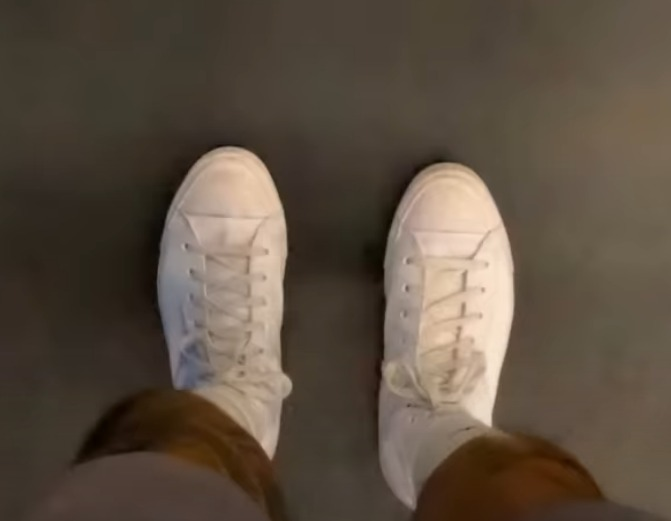

    ### Correct
    ![Feetwidth-correct.jpeg](attachment:Feetwidth-correct.jpeg)
    
    
    Feet angle - 20-30 deg
    ### Too straight 
    ![Feet angle - not correct.jpeg](<attachment:Feet angle - not correct.jpeg>)

    ### Correct
    ![Feet angle - correct.jpeg](<attachment:Feet angle - correct.jpeg>)
    

2. neutral position of the hips
    ### Rotated
    ![Rotated hip.jpeg](<attachment:Rotated hip.jpeg>)

    ### Neutral hips 
    ![Neutral hip position.jpeg](<attachment:Neutral hip position.jpeg>)


3. Correct pretension on the knees


4. Bracing the core 



The guidance will be provided by markers on the recording screen window 

### Step 2 - Ready to start the set

When the user is ready, he/she will give a thumbs up to indicate the same. We will use thumbs symbol as a placeholder. Then we will count down the to the start of the set. Aborting should be indicated 


### Step 3 - Form monitoring, counting the rep

The code will calculate and signal if the correct depth is reached by providing a green tick and reduce one from the target repetitions.

#### What are the most forms of mistakes the user can do?
Here is a summary of the video you requested:

- **How to squat properly**: The video explains the common mistakes and the correct technique of performing a barbell squat, which is a compound exercise that works the quads, glutes, hamstrings, and core muscles.
- **Common mistakes**: The video identifies four common mistakes that people make when squatting: 1) Not bracing the core properly, which can lead to lower back pain and injury. 2) Not breaking at the hips first, which can cause the knees to cave in and the heels to lift off the ground. 3) Not going deep enough, which can limit the muscle activation and the range of motion. 4) Not keeping the elbows down, which can create tension in the upper back and shoulders and affect the bar path.
- **Correct technique**: The video demonstrates the correct technique of squatting with the following steps: 1) Set up the bar on the rack at shoulder height and grip it with a comfortable width. 2) Step under the bar and position it on the upper back, either on the traps (high bar) or the rear delts (low bar). 3) Unrack the bar and take a few steps back. 4) Set your feet slightly wider than shoulder width and point your toes slightly outwards. 5) Brace your core by taking a deep breath and squeezing your abs. 6) Break at the hips first and then bend your knees to lower yourself until your thighs are at least parallel to the ground. 7) Keep your chest up, your back straight, your elbows down, and your knees in line with your toes. 8) Drive through your heels and push your hips forward to stand up. 9) Exhale at the top and repeat for the desired number of reps.
- **Tips and variations**: The video also provides some tips and variations to improve your squat performance and avoid injuries. Some of them are: 1) Warm up properly before squatting with some mobility exercises and lighter sets. 2) Use a belt to increase your intra-abdominal pressure and stability. 3) Use a spotter or safety pins to help you in case of failure. 4) Vary your stance width and bar position to target different muscle groups and find your optimal form. 5) Incorporate some accessory exercises, such as lunges, leg presses, and leg curls, to strengthen your weak points and prevent imbalances.


Tasks for squat tutorial

1. leg and hand positions before start of exercise
2. signal that the exercise person ready
3. countdown to exercise 
4. counting reps
5. countingn time - up and down
6. create a mock up of a gym camera so we have the same reference points 


1. Installing libraries

This line installs the required packages for the tutorial, specifically `mediapipe` (which is a library for hand, pose, and face detection) and `opencv-python` (a library for computer vision tasks).

In [ ]:
%pip install mediapipe opencv-python

2. Installing Dependencies 

Here, the necessary libraries are imported:

- `cv2`: This is the OpenCV library which is used for various computer vision tasks.
- `mediapipe as mp`: Mediapipe is imported with the alias `mp`.
- `numpy as np`: Numpy is imported with the alias `np`.
- `mp_drawing`: This is a utility from Mediapipe to help with drawing on images.
- `mp_pose`: This helps in detecting human poses using Mediapipe.

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

3. This block of code sets up a video feed using OpenCV.

- `cv2.VideoCapture(0)`: This initializes the video capture with the primary webcam of the computer.
- `while cap.isOpened()`: Continuously capture frames as long as the webcam is active.
- `ret, frame = cap.read()`: Read a frame from the webcam. `ret` is a boolean that indicates if the frame was successfully grabbed.
- `cv2.imshow('Mediapipe Feed', frame)`: This displays the captured frame in a window named 'Mediapipe Feed'.
- `if cv2.waitKey(10) & 0xFF == ord('q')`: This checks if the 'q' key is pressed. If pressed, it breaks out of the loop to stop capturing.
- `cap.release()`: Releases the video capture object.
- `cv2.destroyAllWindows()`: Closes all OpenCV windows.

In [ ]:
# VIDEO FEED
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab a frame")
        break
    cv2.imshow('Mediapipe Feed', frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


4. Pose detection

This block of code captures video from the webcam and processes each frame using Mediapipe to detect human poses.
The code inside the `with` statement initializes the pose detection from Mediapipe.
Each frame from the webcam is converted from BGR (Blue, Green, Red - the default format of OpenCV) to RGB (Red, Green, Blue - the format Mediapipe uses).
`pose.process(image)`: Detects the pose in the image.
The detected landmarks (keypoints of the pose) are then drawn on the image using `mp_drawing.draw_landmarks(...)`. The processed image is then displayed using `cv2.imshow(...)`. The loop continues until the 'q' key is pressed.

This block of code is very similar to the one we discussed earlier. The main addition is the extraction of landmarks.
The line `landmarks = results.pose_landmarks.landmark` extracts the pose landmarks (keypoints) detected by Mediapipe. These landmarks represent different parts of the body, like the nose, eyes, shoulders, elbows, etc.
The extracted landmarks are then printed to the console.
The `try` and `except` block is used to handle any potential errors that might arise when extracting landmarks. If there's an error (e.g., no landmarks detected), the code inside the `except` block is executed, which in this case, does nothing (using `pass`).


This function, named `calculate_angle`, is designed to compute the angle formed by three points: `a`, `b`, and `c`, where `b` acts as the vertex of the angle.
The function performs the following steps:
- Converts the points `a`, `b`, and `c` to numpy arrays to facilitate mathematical operations.
- Calculates the angle using the arctangent function. The difference in the arctangents of the slopes defined by the points gives the angle in radians.
- Converts the angle from radians to degrees.
- If the resulting angle exceeds 180 degrees, it calculates the supplementary angle.
- Returns the computed angle.


In [ ]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 


This block captures video from the webcam and processes each frame with Mediapipe to detect human poses.
The major steps involved are:
1. **Frame Capture**: The video capture is initialized, and frames are continuously read.
2. **Color Conversion**: Each frame is converted from BGR to RGB, which is the format expected by Mediapipe.
3. **Pose Detection**: The frame is processed using Mediapipe's pose detection. The result contains pose landmarks.
4. **Angle Calculation**:
   - The landmarks corresponding to the left shoulder, elbow, and wrist are extracted.
   - The angle at the elbow (formed by the shoulder, elbow, and wrist) is calculated using the `calculate_angle` function.
   - This angle is displayed on the video feed near the elbow position.
5. **Bicep Curl Detection**: A simple logic is implemented to detect the motion of a bicep curl exercise:
   - When the arm is fully extended (angle > 160 degrees), the stage is set to "down".
   - If the arm is curled (angle < 30 degrees) and the previous stage was "down", the counter increments, indicating a completed bicep curl repetition.
6. **Display Information**: The counter and the stage ("up" or "down") are displayed on the video feed.
7. **Landmark Rendering**: Detected landmarks and their connections are drawn on the frame.
8. **Display Video Feed**: The processed frame, with landmarks and angle information, is displayed in a window.
9. **Exit Condition**: The video feed can be stopped by pressing the 'q' key.


In [ ]:
cap = cv2.VideoCapture(1)
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        # Stop the code when the video is over
        if not ret:
            print('Failed to grab a frame')
            break
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
            
            # Visualize angle
            cv2.putText(image, str(angle), 
                           tuple(np.multiply(elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
                       
        except:
            pass
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import time
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Define a function that calculates an angle between three points in x,y space
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
    return angle 

# Specify the location of the file with the video to be read
filename_r = '/Users/vijaishankarbhavanishankar/Documents/EschAR/MediaPipePoseEstimation-eschar/Data/videos/IMG_3620_RepCountV2.mp4'
# Specify the location where the new video with detections will be written
filename_w = '/Users/vijaishankarbhavanishankar/Documents/EschAR/MediaPipePoseEstimation-eschar/Data/videos/IMG_3620_RepCountV2-output.mp4'
# Capture the video from the file
cap = cv2.VideoCapture(filename_r)

# Get video frame dimensions and fps
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
frame_size = (frame_width,frame_height)
fps = cap.get(5)

# Create a video writer object
output = cv2.VideoWriter(filename_w, cv2.VideoWriter_fourcc(*'XVID'), fps, frame_size)

# Initialize the Rep Counter variables
real_counter = 0
stage = None
rep_count = 0
last_event_time = None
frame_count = 0

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:

    fps = cap.get(5)
    frame_width  = int(cap.get(3))
    frame_height = int(cap.get(4))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab a frame")
            break
        # Count frames and calculate time in video
        frame_count += 1
        time = frame_count / fps #[s]

        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            
            # Calculate angle
            angle = calculate_angle(hip, knee, ankle)
            
            # Visualize angle
            cv2.putText(image, f"{angle:.1f}", 
                           tuple(np.multiply(knee, frame_size).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
            
            ##########################################################################################################################
            # Rep Counter logic
            # The rep is registered when the knee bend angle goes from the upper limit to the lower limit
            upper_limit = 160
            lower_limit = 80
            # Specify the minimum rep number to start registering the set
            min_rep_count = 2
            # Specify the minimum time between reps
            min_rep_time = 3 #[s]
            # Above the upper angle limit, register the "hold up" stage
            if angle >= upper_limit:
                stage = 'hold up'
            # Below the upper limit and after the "hold up" stage, register "down" stage
            if angle < upper_limit and stage == 'hold up':
                stage = 'down'
            # Below the lower limit and after the "down" stage, register the "hold down" stage
            if angle < lower_limit and stage =='down':
                stage = 'hold down'
            # Above the lower limit and after the "hold down" stage, register the "up" stage and count the rep
            if angle > lower_limit and stage == 'hold down':
                stage = 'up'
                rep_count +=1
                last_event_time = time
                print(last_event_time)

            # Register the real rep count only for sets with more than the min rep count
            if rep_count >= min_rep_count:
                real_counter = rep_count
            # Restart the counter when the reps do not repeat in less than the min rep time
            if time - last_event_time > min_rep_time:
                rep_count = 0
            ##########################################################################################################################

        except:
            pass
        
        
        # Render Rep Counter
        # Set the position of the Rep Counter window
        x_offset = 50
        y_offset = 100
        # Setup status box
        cv2.rectangle(image, (x_offset,y_offset), (390+x_offset,73+y_offset), (128,128,128), -1)
        # Rep data
        cv2.putText(image, 'REPS', (15+x_offset,12+y_offset), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(real_counter), 
                    (10+x_offset,60+y_offset), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        # Stage data
        cv2.putText(image, 'STAGE', (65+x_offset,12+y_offset), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (60+x_offset,60+y_offset), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        

        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        # Display and write the video
        if ret == True:
            cv2.imshow('Mediapipe Feed', image)
            output.write(image)

            # Pause or stop the video when instructed
            key = cv2.waitKey(5)
            # Stop by pressing 'q'
            if key == ord('q'):
                break
            # Pause by pressing 'w', resume by pressing any other key
            if key == ord('w'):
                cv2.waitKey(-1)


    cap.release()
    cv2.destroyAllWindows()

